### Описание расчетов с обоснованием методов и формул

---

#### 1. Формула потерь давления на клапане
Формула:  

$\Delta P = \left( \frac{Q}{K_v} \right)^2 \cdot 100 \quad \text{[кПа]}$

Переменные:  
- \( Q \) — расход среды, м³/ч;  
- \( K_v \) — пропускная способность клапана при текущем положении штока, м³/ч.  

Обоснование:  
Формула основана на определении коэффициента \( K_v \), который характеризует расход воды (при 15–30°C) через полностью открытый клапан при перепаде давления 1 бар. Для других сред и перепадов давления используется преобразованная зависимость, связывающая \( K_v \), расход и перепад давления.  

---

#### 2. Типы расходных характеристик клапана
##### a) Линейная характеристика  
Формула: 

$K_v(h) = K_{vs} \cdot \left( \Phi_0 + (1 - \Phi_0) \cdot h \right)$
Переменные:  
- \( h \) — положение штока (0–1);  
- \( \Phi_0 \) — начальная относительная пропускная способность (обычно 0.02–0.05).  

Описание:  
Пропускная способность изменяется линейно с положением штока. Используется в системах, где требуется прямая зависимость расхода от управляющего сигнала.  

##### b) Равнопроцентная характеристика  
Формула:  

$K_v(h) = K_{vs} \cdot \Phi_0^{1 - h}$
 
Описание:  
Логарифмическая зависимость, где одинаковому изменению положения штока соответствует одинаковый процент изменения \( K_v \). Подходит для систем с нелинейными нагрузками (например, регулирование температуры).  

##### c) Параболическая характеристика  
Формула:  
$K_v(h) = K_{vs} \cdot \left( \Phi_0 + (1 - \Phi_0) \cdot h^2 \right)$
 
Описание:  
Квадратичная зависимость, обеспечивающая плавное регулирование при малых открытиях. Применяется в системах с высокими требованиями к точности в начальном диапазоне.  



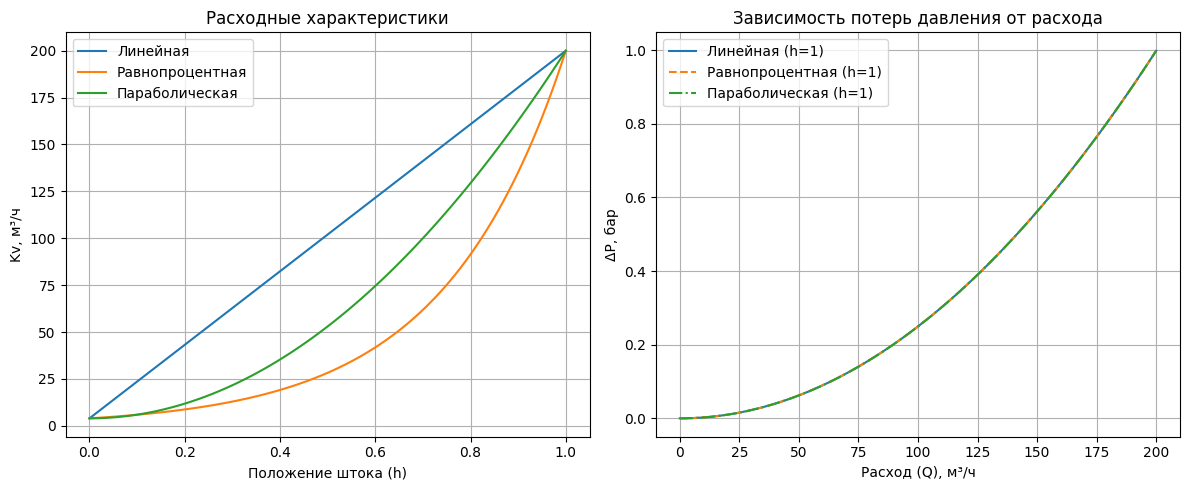

ΔP при Q=Kvs: 1.00 бар


In [16]:
import numpy as np
import matplotlib.pyplot as plt

class ControlValve:
    def __init__(self, Kvs, F0=0.02, density=998.2):
        self.Kvs = Kvs  # м³/ч
        self.F0 = F0    # относительный начальный расход
        self.density = density  # кг/м³

    def linear_Kv(self, h):
        return self.Kvs * (self.F0 + (1 - self.F0) * h)

    def equal_percent_Kv(self, h):
        return self.Kvs * self.F0**(1 - h)

    def parabolic_Kv(self, h):
        return self.Kvs * (self.F0 + (1 - self.F0) * h**2)

    def calculate_pressure_loss(self, flow, Kv):
        if Kv == 0:
            return 0
        # ΔP = (Q/(Kv))² * (ρ/1000) [бар]
        return (flow / Kv)**2 * (self.density / 1000)

    def plot_characteristics(self):
        h_values = np.linspace(0, 1, 100)
        flows = np.linspace(0, self.Kvs, 100)  # От 0 до Kvs

        # Расчет потерь давления при h=1 (Kv=Kvs)
        deltaP_linear = [self.calculate_pressure_loss(q, self.Kvs) for q in flows]
        deltaP_equal = [self.calculate_pressure_loss(q, self.Kvs) for q in flows]
        deltaP_parab = [self.calculate_pressure_loss(q, self.Kvs) for q in flows]

        # Построение графиков
        plt.figure(figsize=(12, 5))
        
        # График 1: Характеристики клапана
        plt.subplot(1, 2, 1)
        plt.plot(h_values, [self.linear_Kv(h) for h in h_values], label='Линейная')
        plt.plot(h_values, [self.equal_percent_Kv(h) for h in h_values], label='Равнопроцентная')
        plt.plot(h_values, [self.parabolic_Kv(h) for h in h_values], label='Параболическая')
        plt.xlabel('Положение штока (h)')
        plt.ylabel('Kv, м³/ч')
        plt.title('Расходные характеристики')
        plt.grid(True)
        plt.legend()

        # График 2: Потери давления
        plt.subplot(1, 2, 2)
        plt.plot(flows, deltaP_linear, label='Линейная (h=1)')
        plt.plot(flows, deltaP_equal, '--', label='Равнопроцентная (h=1)')
        plt.plot(flows, deltaP_parab, '-.', label='Параболическая (h=1)')
        plt.xlabel('Расход (Q), м³/ч')
        plt.ylabel('ΔP, бар')
        plt.title('Зависимость потерь давления от расхода')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Тестирование
cv = ControlValve(Kvs=200)
cv.plot_characteristics()

# Проверка при Q=Kvs
test_Q = 200
test_deltaP = cv.calculate_pressure_loss(test_Q, cv.Kvs)
print(f'ΔP при Q=Kvs: {test_deltaP:.2f} бар')  # Должно быть ~1.0 бар


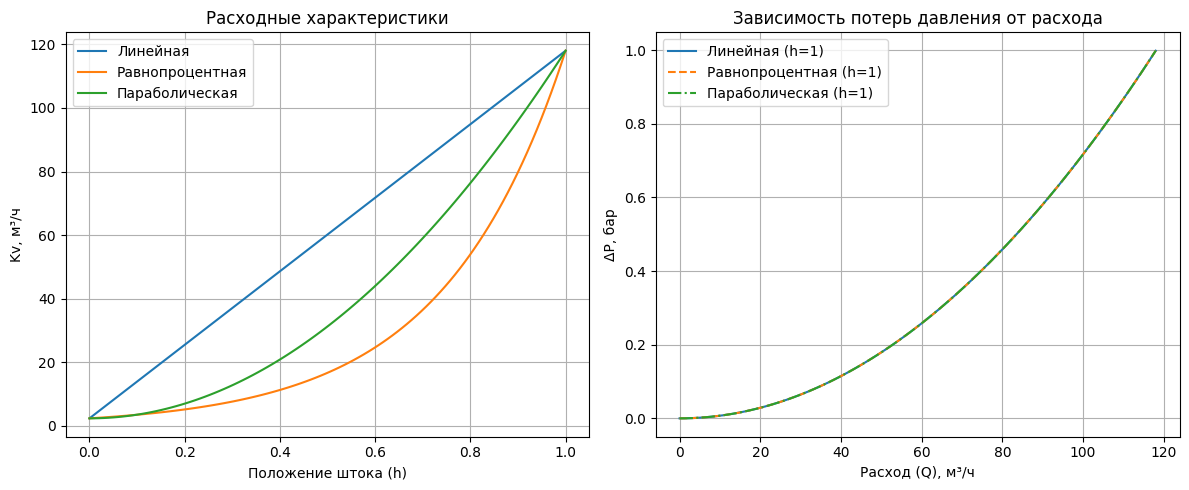

In [17]:

# Пример использования
cv = ControlValve(Kvs=118)
cv.plot_characteristics()


In [18]:
import math

def calculate_valve_max_diameter(Q_max_m3_h, V_max_m_s=3.5, rho=963):
    """
    Рассчитывает максимальный диаметр регулирующего клапана .
    СТ_ЦКБА_040_2006
    
    Параметры:
    Q_max_m3_h (float): Максимальный расход (кг/с).
    V_max_m_s (float): Максимальная скорость потока (кг/с).
    rho (float): Плотность среды 963(кг/м³).
    
    Возвращает:
    максимальный диаметр трубопровода (mм).
    """
    
    # Расчет максимального диаметра
    D_max = math.sqrt((4 * Q_max_m3_h/3.6) / (math.pi * V_max_m_s * rho))
    
    return int(D_max*1000)

In [25]:
calculate_valve_max_diameter(Q_max_m3_h=13, V_max_m_s=2.5)

43